In [ ]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import load_model
from datetime import datetime, date
from datetime import timedelta
import prophet

In [ ]:
stocksdata="AAPL"
df=yf.download(stocksdata,start="1981-1-1",end="2020-12-31")
df = df.reset_index()
df['Date']

[*********************100%%**********************]  1 of 1 completed


0       1981-01-02
1       1981-01-05
2       1981-01-06
3       1981-01-07
4       1981-01-08
           ...    
10081   2020-12-23
10082   2020-12-24
10083   2020-12-28
10084   2020-12-29
10085   2020-12-30
Name: Date, Length: 10086, dtype: datetime64[ns]

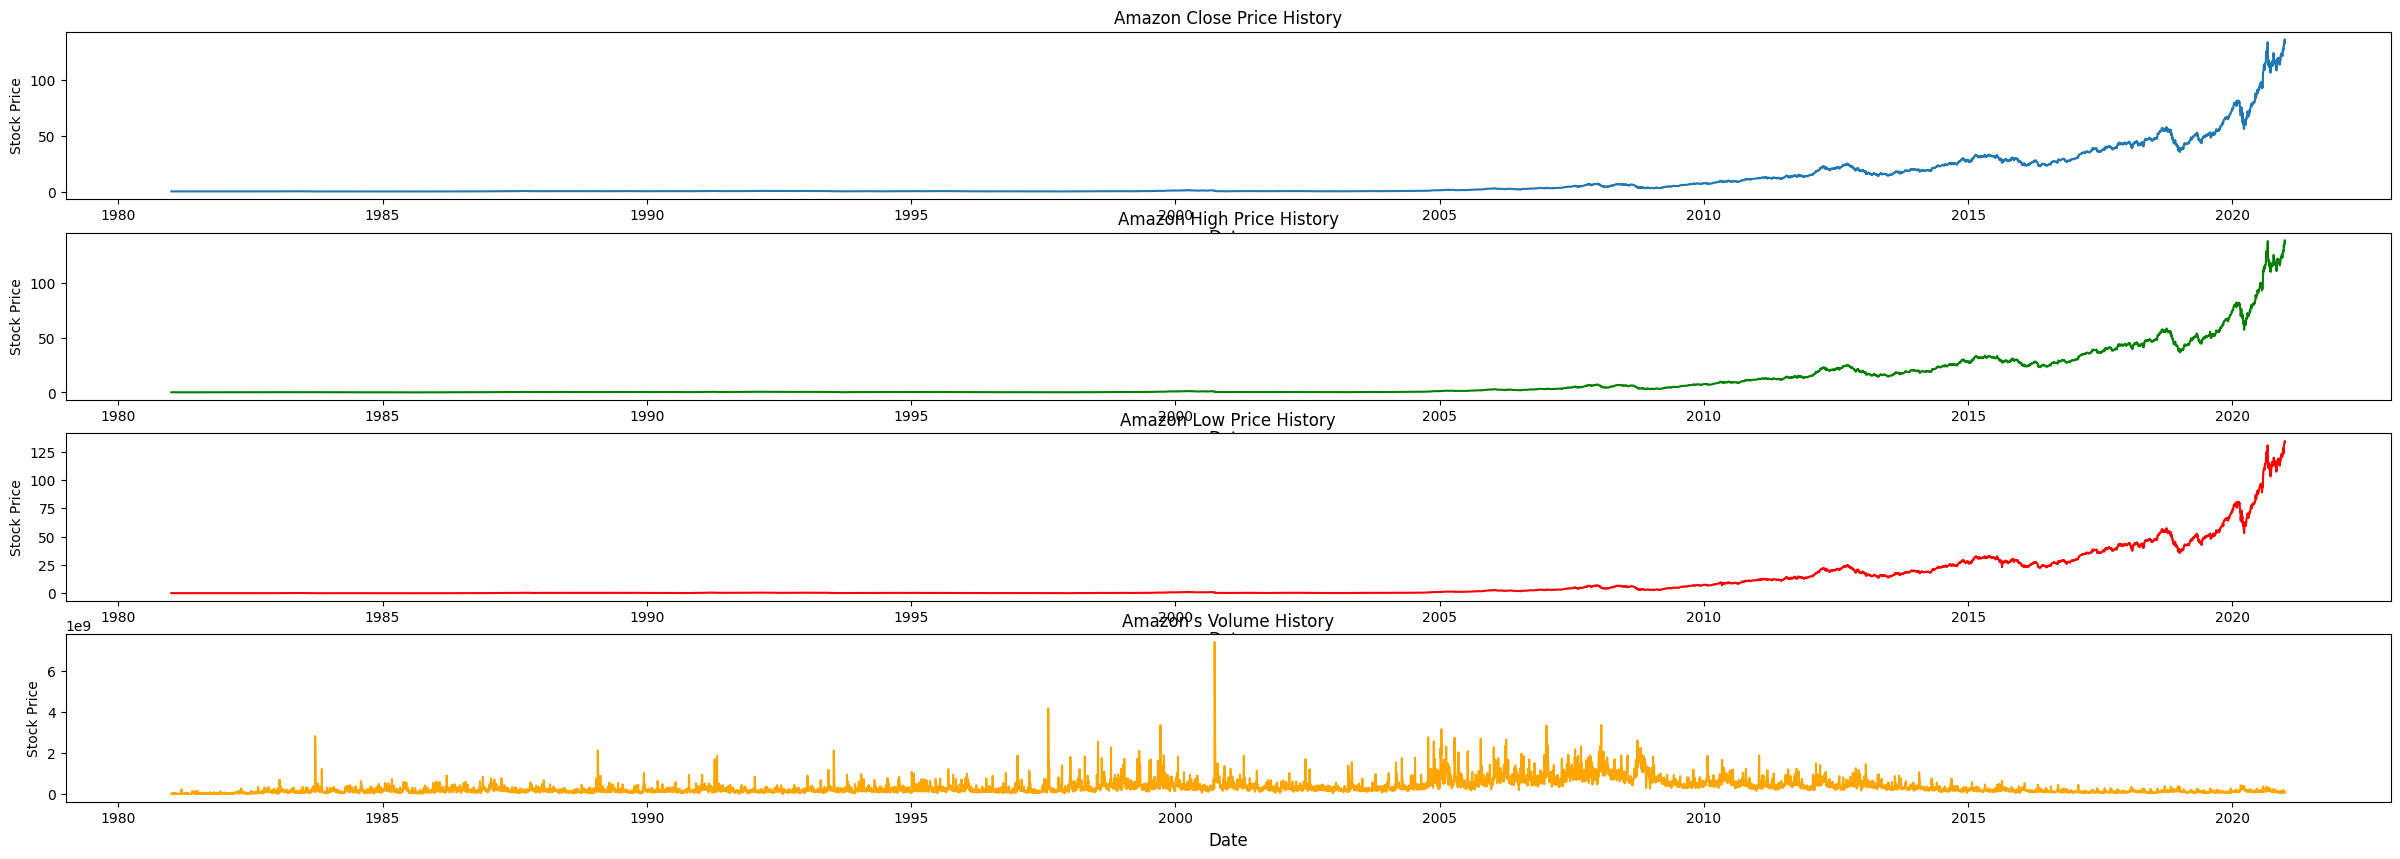

In [ ]:
f, ax = plt.subplots( 4, figsize=(30,10))
ax[0].plot(df["Date"], df["Close"])
ax[0].set_xlabel("Date", fontsize=12)
ax[0].set_ylabel("Stock Price")
ax[0].set_title("Amazon Close Price History")

# Second Subplot
ax[1].plot(df["Date"], df["High"], color="green")
ax[1].set_xlabel("Date", fontsize=12)
ax[1].set_ylabel("Stock Price")
ax[1].set_title("Amazon High Price History")

# Third Subplot
ax[2].plot(df["Date"], df["Low"], color="red")
ax[2].set_xlabel("Date", fontsize=12)
ax[2].set_ylabel("Stock Price")
ax[2].set_title("Amazon Low Price History")

# Fourth Subplot
ax[3].plot(df["Date"], df["Volume"], color="orange")
ax[3].set_xlabel("Date", fontsize=12)
ax[3].set_ylabel("Stock Price")
ax[3].set_title("Amazon's Volume History")
plt.show()

In [ ]:
model = prophet.Prophet()
data = df[['Date','Close']]
data

,Date,Close
0,1981-01-02,0.154018
1,1981-01-05,0.150670
2,1981-01-06,0.143973
3,1981-01-07,0.137835
4,1981-01-08,0.135045
...,...,...
10081,2020-12-23,130.960007
10082,2020-12-24,131.970001
10083,2020-12-28,136.690002
10084,2020-12-29,134.869995


In [ ]:
data.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)
data.columns = ['ds','y']
data

<ipython-input-31-70c3a9aac86f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)


,ds,y
0,1981-01-02,0.154018
1,1981-01-05,0.150670
2,1981-01-06,0.143973
3,1981-01-07,0.137835
4,1981-01-08,0.135045
...,...,...
10081,2020-12-23,130.960007
10082,2020-12-24,131.970001
10083,2020-12-28,136.690002
10084,2020-12-29,134.869995


In [ ]:
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb4ridzr_/nruf9s7w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb4ridzr_/tx9tb57j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25351', 'data', 'file=/tmp/tmpb4ridzr_/nruf9s7w.json', 'init=/tmp/tmpb4ridzr_/tx9tb57j.json', 'output', 'file=/tmp/tmpb4ridzr_/prophet_modelujxlytb9/prophet_model-20240108173012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:30:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:30:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_close1y = model.make_future_dataframe(periods=365,include_history=False)
future_close1y

,ds
0,2020-12-31
1,2021-01-01
2,2021-01-02
3,2021-01-03
4,2021-01-04
...,...
360,2021-12-26
361,2021-12-27
362,2021-12-28
363,2021-12-29


In [ ]:
forcast = model.predict(future_close1y)
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-31,75.260509,67.218105,83.026832,75.260509,75.260509,0.113917,0.113917,0.113917,-0.007832,-0.007832,-0.007832,0.121750,0.121750,0.121750,0.0,0.0,0.0,75.374427
1,2021-01-01,75.283235,67.653182,82.620380,75.283235,75.283235,-0.013412,-0.013412,-0.013412,-0.061362,-0.061362,-0.061362,0.047950,0.047950,0.047950,0.0,0.0,0.0,75.269823
2,2021-01-02,75.305961,67.907676,83.194496,75.305961,75.305961,-0.020007,-0.020007,-0.020007,0.005756,0.005756,0.005756,-0.025762,-0.025762,-0.025762,0.0,0.0,0.0,75.285955
3,2021-01-03,75.328687,67.253390,83.715078,75.328687,75.328687,-0.092871,-0.092871,-0.092871,0.005756,0.005756,0.005756,-0.098626,-0.098626,-0.098626,0.0,0.0,0.0,75.235817
4,2021-01-04,75.351413,67.895330,82.830067,75.351413,75.351413,-0.149922,-0.149922,-0.149922,0.019984,0.019984,0.019984,-0.169906,-0.169906,-0.169906,0.0,0.0,0.0,75.201491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-26,83.441857,75.444946,92.407020,83.049733,83.881680,0.486582,0.486582,0.486582,0.005756,0.005756,0.005756,0.480826,0.480826,0.480826,0.0,0.0,0.0,83.928439
361,2021-12-27,83.464583,75.971407,91.681481,83.069535,83.906343,0.438744,0.438744,0.438744,0.019984,0.019984,0.019984,0.418761,0.418761,0.418761,0.0,0.0,0.0,83.903327
362,2021-12-28,83.487309,75.547359,92.212543,83.089338,83.931006,0.367436,0.367436,0.367436,0.014449,0.014449,0.014449,0.352988,0.352988,0.352988,0.0,0.0,0.0,83.854745
363,2021-12-29,83.510035,75.960863,91.755188,83.109141,83.955668,0.307404,0.307404,0.307404,0.023251,0.023251,0.023251,0.284153,0.284153,0.284153,0.0,0.0,0.0,83.817439


In [ ]:
output = forcast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
output

,ds,yhat,yhat_lower,yhat_upper
0,2020-12-31,75.374427,67.218105,83.026832
1,2021-01-01,75.269823,67.653182,82.620380
2,2021-01-02,75.285955,67.907676,83.194496
3,2021-01-03,75.235817,67.253390,83.715078
4,2021-01-04,75.201491,67.895330,82.830067
...,...,...,...,...
360,2021-12-26,83.928439,75.444946,92.407020
361,2021-12-27,83.903327,75.971407,91.681481
362,2021-12-28,83.854745,75.547359,92.212543
363,2021-12-29,83.817439,75.960863,91.755188


In [ ]:
stocksdata="AAPL"
df_real=yf.download(stocksdata,start="2020-12-31",end="2021-12-31")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df_real = df_real.reset_index()

Text(28.374999999999993, 0.5, 'Close Price')

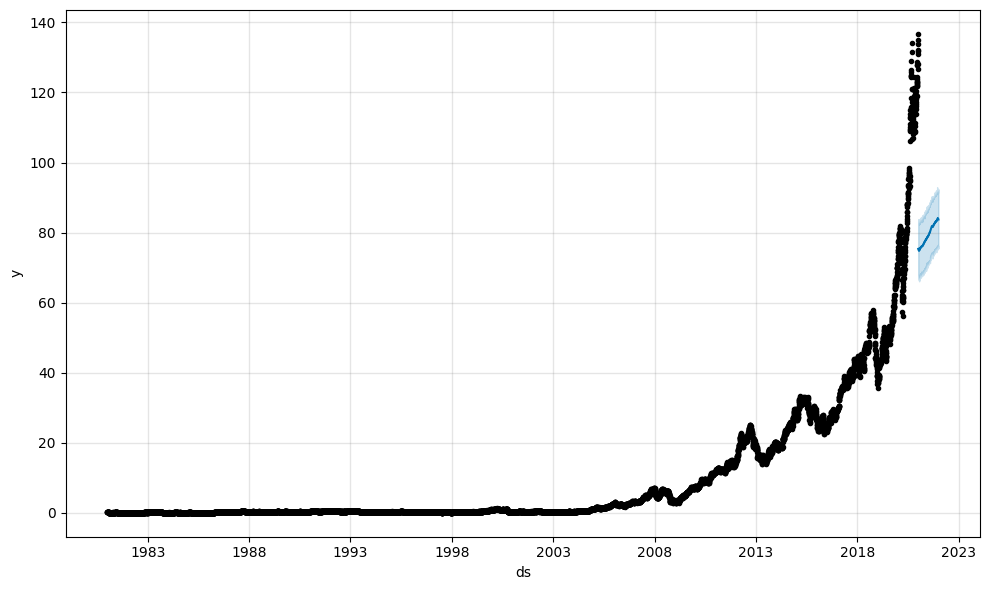

In [ ]:
fig = model.plot(forcast)
#ax1 = fig.add_subplot(111)
ax1.set_title("Apple Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

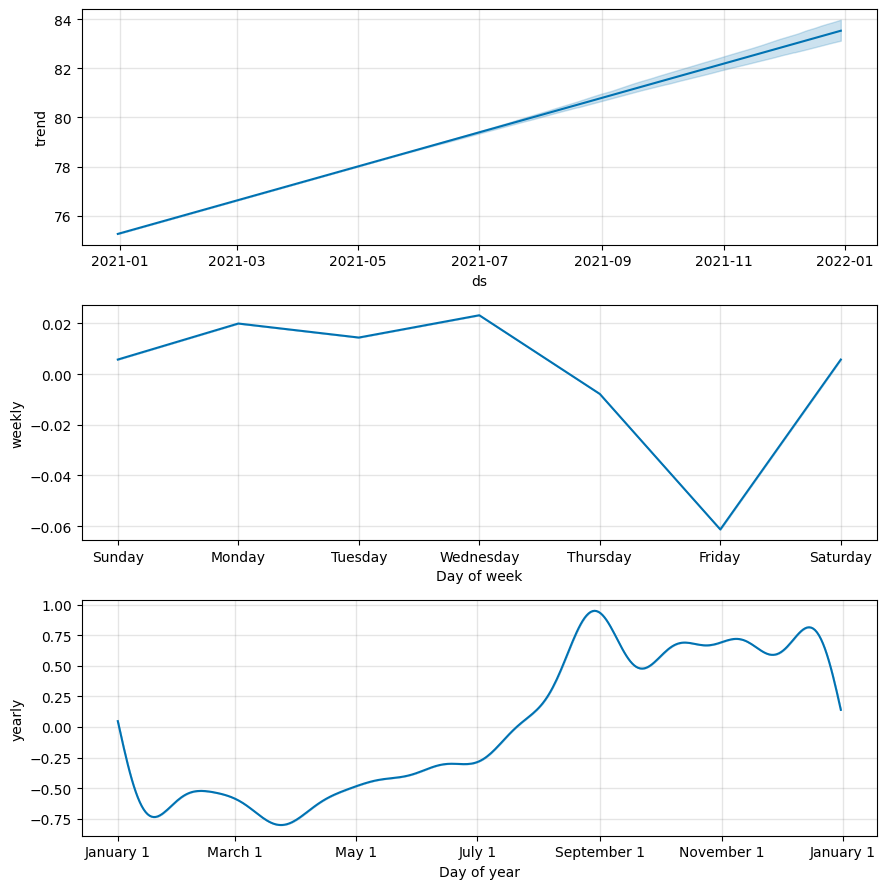

In [ ]:
fig2 = model.plot_components(forcast)
plt.show()

Text(0.5, 1.0, 'forcasted Close Price values')

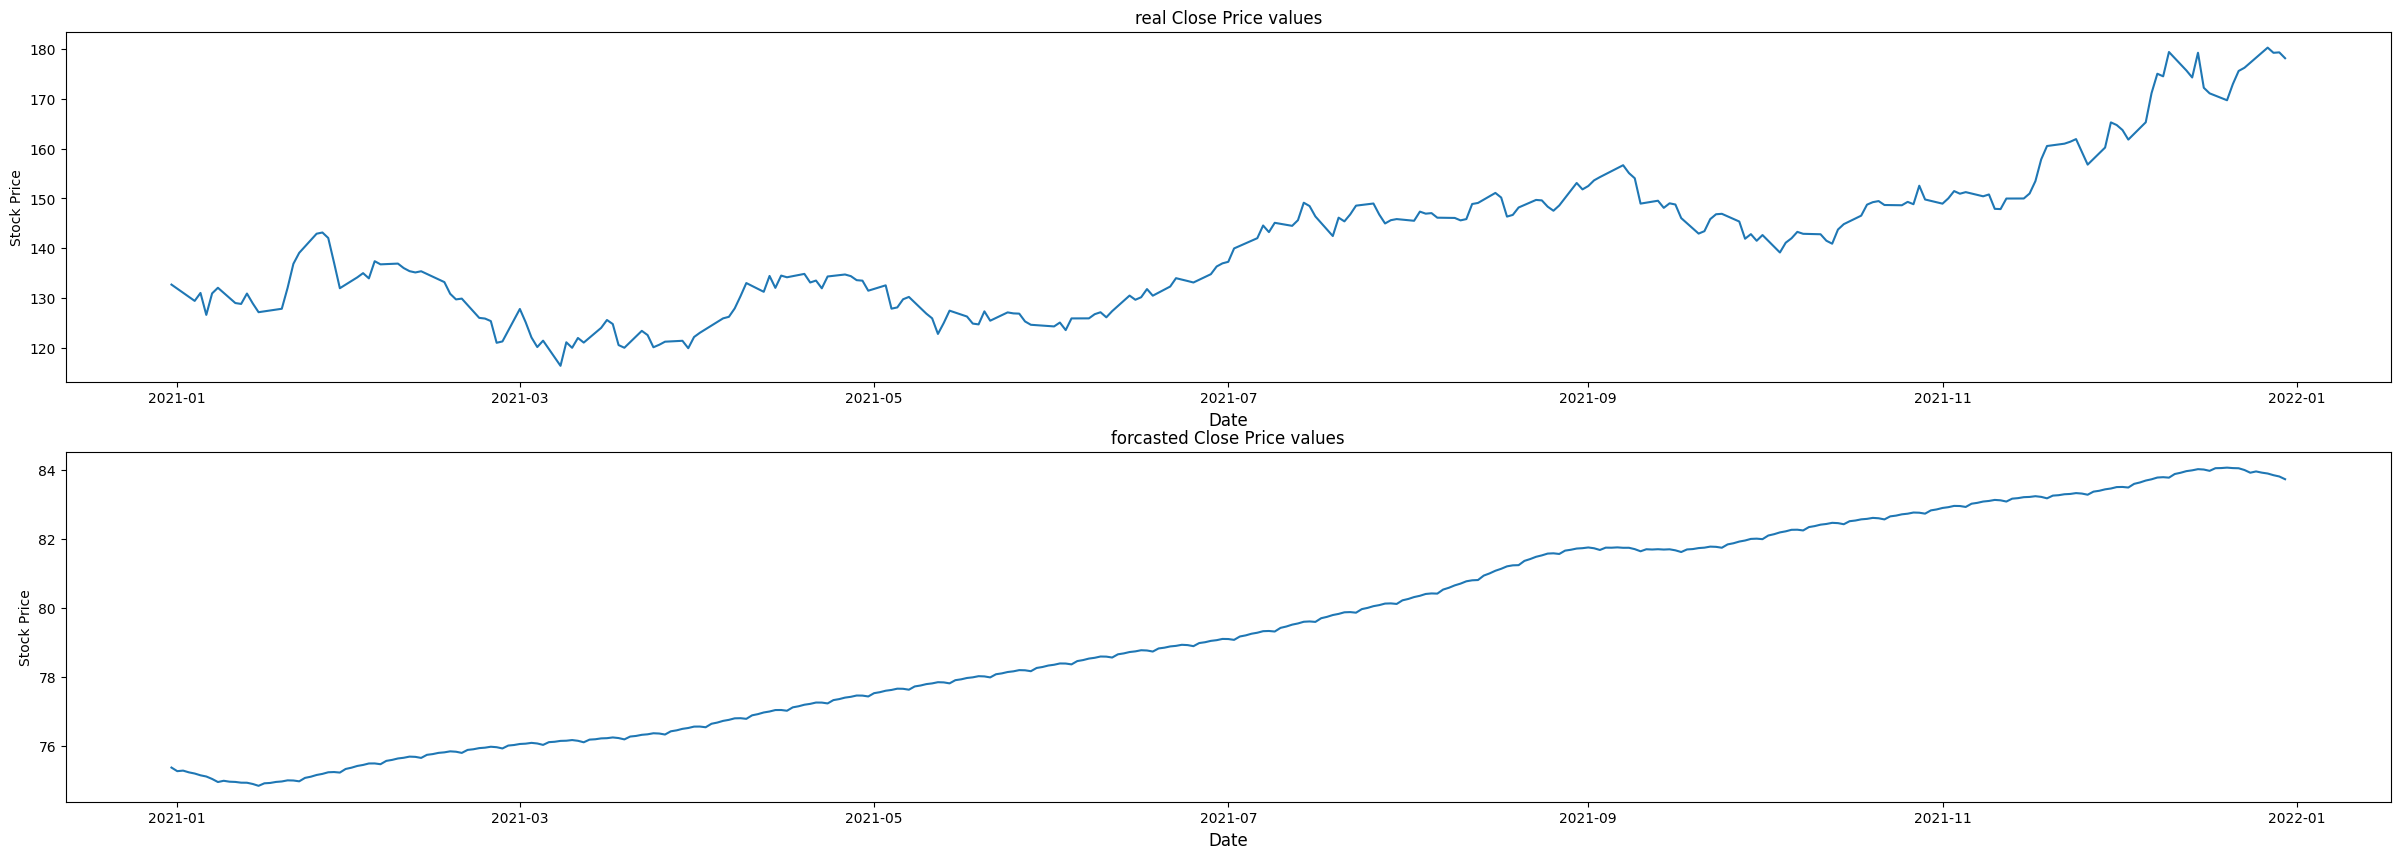

In [ ]:
f, ax1 = plt.subplots( 2, figsize=(30,10))

ax1[0].plot(df_real["Date"], df_real["Close"])
ax1[0].set_xlabel("Date", fontsize=12)
ax1[0].set_ylabel("Stock Price")
ax1[0].set_title("real Close Price values")

ax1[1].plot(output["ds"], output["yhat"])
ax1[1].set_xlabel("Date", fontsize=12)
ax1[1].set_ylabel("Stock Price")
ax1[1].set_title("forcasted Close Price values")

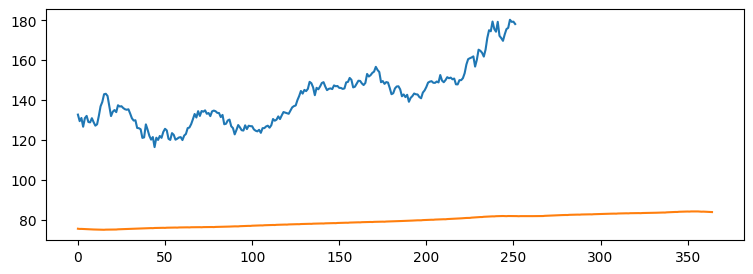

In [ ]:
plt.figure(figsize=(9,3))
plt.plot(df_real["Close"])
plt.plot(output["yhat"])

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.preprocessing import MinMaxScaler
alldays = model.make_future_dataframe(periods=365)
allday_forcast = model.predict(alldays)
plot_plotly(model ,allday_forcast)
sc = MinMaxScaler(feature_range=(0,1))

d = data['y']
data['y']=sc.fit_transform(np.array(d).reshape(-1,1))

<ipython-input-50-52c47334642a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
model_sc = prophet.Prophet()
model_sc.fit(data)

sc_allday_forcast = model_sc.predict(alldays)
plot_plotly(model_sc ,sc_allday_forcast)

sc_forcast = model_sc.predict(future_close1y)
d = df_real['Close']
df_real['Close']=sc.fit_transform(np.array(d).reshape(-1,1))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb4ridzr_/2h_dsjnq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb4ridzr_/djhdv5ae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33556', 'data', 'file=/tmp/tmpb4ridzr_/2h_dsjnq.json', 'init=/tmp/tmpb4ridzr_/djhdv5ae.json', 'output', 'file=/tmp/tmpb4ridzr_/prophet_model370o1h1o/prophet_model-20240108174120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:41:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:41:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


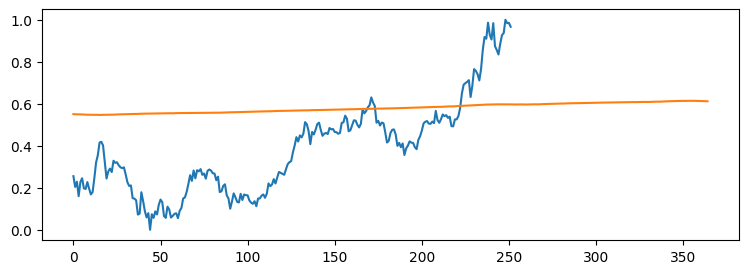

In [ ]:
plt.figure(figsize=(9,3))
plt.plot(df_real["Close"])
plt.plot(sc_forcast["yhat"])

In [ ]:
wh_date = df_real['Date']
wh_date = pd.DataFrame(wh_date)
wh_date.columns = ['ds']

pred = model_sc.predict(wh_date)
len(pred['yhat'])

252

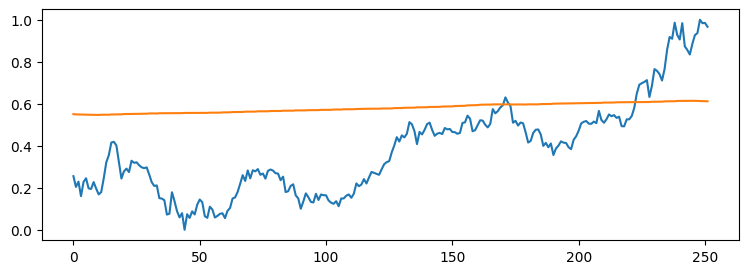

In [ ]:
plt.figure(figsize=(9,3))
plt.plot(df_real["Close"])
plt.plot(pred["yhat"])

In [ ]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [25,50,100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 50


In [ ]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(pred['yhat'],df_real['Close'])

new_model1 = prophet.Prophet(changepoint_range=0.9)
new_model1.fit(data)
pred1 = new_model1.predict(wh_date)

mape(pred1['yhat'],df_real['Close'])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb4ridzr_/fnz7l36n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb4ridzr_/292bvl3b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41282', 'data', 'file=/tmp/tmpb4ridzr_/fnz7l36n.json', 'init=/tmp/tmpb4ridzr_/292bvl3b.json', 'output', 'file=/tmp/tmpb4ridzr_/prophet_modeljtl86wwf/prophet_model-20240108174705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.521205172196946

In [ ]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(pred['yhat'],df_real['Close'])

new_model1 = prophet.Prophet(changepoint_range=0.9)
new_model1.fit(data)
pred1 = new_model1.predict(wh_date)

mape(pred1['yhat'],df_real['Close'])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb4ridzr_/5v707327.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb4ridzr_/vby_25v6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84039', 'data', 'file=/tmp/tmpb4ridzr_/5v707327.json', 'init=/tmp/tmpb4ridzr_/vby_25v6.json', 'output', 'file=/tmp/tmpb4ridzr_/prophet_model9uk3cdnv/prophet_model-20240108174714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.521205172196946

In [ ]:
import pickle
pkl_path = "Prophet_pred.pkl"
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(new_model1, f)

# save the dataframe
#forecast.to_pickle("path/to/data/forecast.pkl")
print("*** Data Saved ***")

*** Data Saved ***


In [ ]:
# read the Prophet model object
with open(pkl_path, 'rb') as f:
    m = pickle.load(f)

#to open data frame with forecasts
fcast = pd.read_pickle("PATH")